In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector

In [21]:
db=mysql.connector.connect(host="localhost",
                           username="root",
                           password="Anjali06@",
                           database="ecommerce")
cur=db.cursor()

### List all unique cities where customers are located

In [22]:
query = """select distinct(customer_city) from customers"""
cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data,columns=["Customer city"])
df

,Customer city
0,franca
1,sao bernardo do campo
2,sao paulo
3,mogi das cruzes
4,campinas
...,...
4114,siriji
4115,natividade da serra
4116,monte bonito
4117,sao rafael


### Count the no of order placed in 2017

In [4]:
query = """select count(order_id) from orders
where year(order_purchase_timestamp)=2017"""
cur.execute(query)
data=cur.fetchall()
print("Total orders placed in 2017 are",data[0][0])

Total orders placed in 2017 are 90202


### Find the total sales per category

In [5]:
query="""select p.product_category,
round(sum(py.payment_value),2) as Total_Sales
from products p join order_items od 
on od.product_id=p.product_id 
join payments py on py.order_id=od.order_id
group by p.product_category"""

cur.execute(query)
data=cur.fetchall()
Df=pd.DataFrame(data,columns=["Category","Total Sales"])
Df

,Category,Total Sales
0,perfumery,2026954.64
1,Furniture Decoration,5720705.57
2,telephony,1947528.20
3,bed table bath,6850214.68
4,automotive,3409177.32
...,...,...
69,cds music dvds,4797.72
70,La Cuisine,11654.12
71,Fashion Children's Clothing,3142.68
72,PC Gamer,8697.72


### Calculate the percentage of orders that were paid in installments

In [6]:
query = """select 
(sum(case when payment_installments >= 1 then 1 else 0 end) )/count(*) * 100
as Percentage_orders
from payments"""
cur.execute(query)
data=cur.fetchall()
print("the percentage of orders that were paid in installments is:",data[0][0])

the percentage of orders that were paid in installments is: 99.9981


### Count the no of customers from each state.

In [7]:
query = """select customer_state ,count(customer_id) as No_of_customers from customers
 group by customer_state"""
cur.execute(query)
data=cur.fetchall()
Df=pd.DataFrame(data,columns=["State","Total Customers"])
Df=Df.sort_values(by="Total Customers",ascending=False)
Df

,State,Total Customers
0,SP,83492
4,RJ,25704
2,MG,23270
5,RS,10932
3,PR,10090
1,SC,7274
9,BA,6760
13,DF,4280
8,ES,4066
7,GO,4040


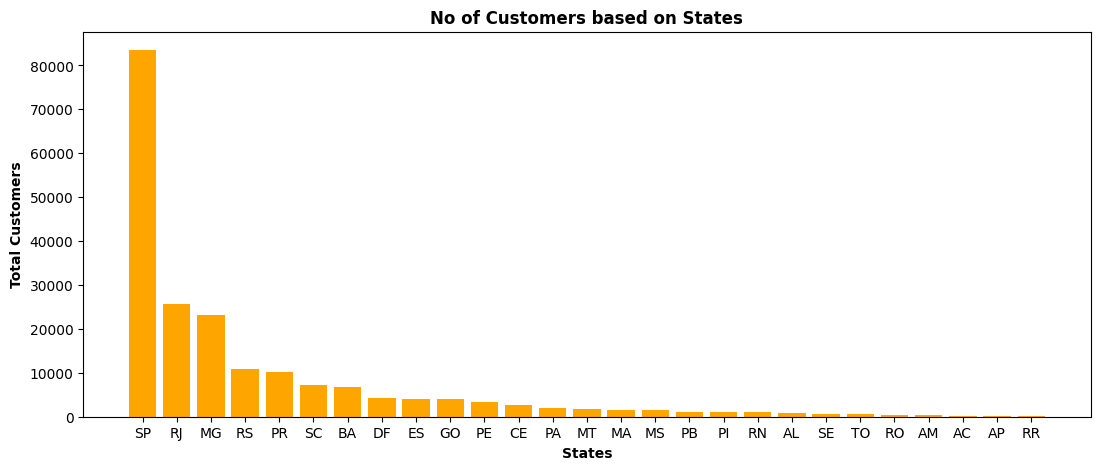

In [8]:
plt.figure(figsize=(13,5))
plt.bar(Df["State"],Df["Total Customers"],color="orange")
plt.xlabel("States",fontweight="bold")
plt.ylabel("Total Customers",fontweight="bold")
plt.title("No of Customers based on States",fontweight="bold")
plt.show()

### Calculate the no of orders per month in 2018

In [9]:
query = """ select monthname(order_purchase_timestamp) as Months,
count(order_id) as Order_count from orders
where year(order_purchase_timestamp)=2018 group by Months """
cur.execute(query)
data=cur.fetchall()
Df=pd.DataFrame(data,columns=["Months","Total Orders"])
Df=Df.sort_values(by="Total Orders",ascending=False)
Df

,Months,Total Orders
5,January,14538
4,March,14422
7,April,13878
6,May,13746
2,February,13456
1,August,13024
0,July,12584
3,June,12334
8,September,32
9,October,8


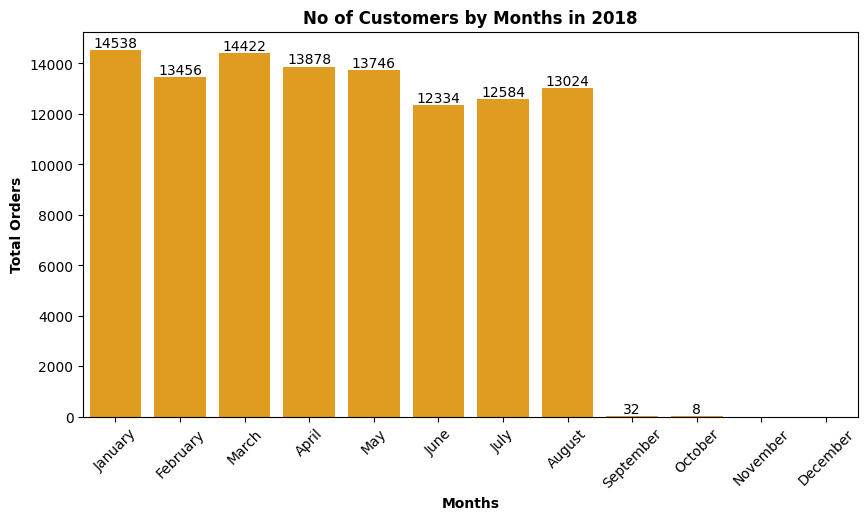

In [10]:
o=["January","February","March","April","May","June","July","August","September","October","November","December"]
plt.figure(figsize=(10,5))
ax=sns.barplot(x="Months",y="Total Orders",data=Df,color="orange",order=o)
plt.xlabel("Months",fontweight="bold")
plt.ylabel("Total Orders",fontweight="bold")
plt.title("No of Customers by Months in 2018",fontweight="bold")
ax.bar_label(ax.containers[0])
plt.xticks(rotation=45)
plt.show()

### Find the average no of products per order,grouped by customer city.

In [11]:
query = """ with Count_per_order as(select o.order_id,o.customer_id,count(od.order_id) as oc from orders o join 
order_items od on o.order_id=od.order_id
group by o.order_id,o.customer_id)

select c.customer_city,round(avg(Count_per_order.oc),2) As Average_orders
from customers c join Count_per_order on
c.customer_id=Count_per_order.customer_id
group by c.customer_city """

cur.execute(query)
data=cur.fetchall()
Df=pd.DataFrame(data,columns=["City","Average Products Per Orders"])
Df=Df.sort_values(by="Average Products Per Orders",ascending=False)
Df

,City,Average Products Per Orders
2812,padre carvalho,14.00
1930,celso ramos,13.00
2397,datas,12.00
3936,candido godoi,12.00
3991,matias olimpio,10.00
...,...,...
2078,inhuma,2.00
2079,porto dos gauchos,2.00
2080,sao joao do sul,2.00
2081,pimenta bueno,2.00


### Calculate the percentage of total revenue contributed by each product category.

In [12]:
query = """ select upper(p.product_category),
round((sum(py.payment_value)/(select sum(payment_value) from payments))*100,2) as Percent_sales
from products p join order_items od 
on od.product_id=p.product_id 
join payments py on py.order_id=od.order_id
group by p.product_category order by Percent_sales desc """
cur.execute(query)
data=cur.fetchall()
Df=pd.DataFrame(data,columns=["Category","Sales Percentage"])
Df

,Category,Sales Percentage
0,BED TABLE BATH,21.40
1,HEALTH BEAUTY,20.71
2,COMPUTER ACCESSORIES,19.81
3,FURNITURE DECORATION,17.87
4,WATCHES PRESENT,17.86
...,...,...
69,PC GAMER,0.03
70,HOUSE COMFORT 2,0.02
71,CDS MUSIC DVDS,0.01
72,FASHION CHILDREN'S CLOTHING,0.01


### Identify the coorelation b/w product price and the no of times a product has been purchased.

In [13]:
query = """ select p.product_category,count(od.product_id) as Count_Product,
 round(avg(od.price),2) as Avg_price
 from products p join order_items od on 
 p.product_id=od.product_id
 group by p.product_category """
cur.execute(query)
data=cur.fetchall()
Df=pd.DataFrame(data,columns=["Category","Count_Product","Average_Price"])
Df

,Category,Count_Product,Average_Price
0,HEALTH BEAUTY,19340,130.16
1,sport leisure,17282,114.34
2,Cool Stuff,7592,167.36
3,computer accessories,15654,116.51
4,Watches present,11982,201.14
...,...,...,...
69,flowers,66,33.64
70,Kitchen portable and food coach,30,264.57
71,CITTE AND UPHACK FURNITURE,76,114.95
72,House Comfort 2,60,25.34


In [14]:
import numpy as np

In [15]:
arr1 = Df["Count_Product"]
arr2=Df["Average_Price"]
a=np.corrcoef([arr1,arr2])
print("The corelation between price and no of times a product has been purchased is",a[0][-1])

The corelation between price and no of times a product has been purchased is -0.10631514167157562


 ### Calculate the total revenue generated by each seller and rank them by revenue

In [16]:
query = """ select * ,dense_rank() over(order by Total_Revenue desc)  as Ranks from
(select od.seller_id,round(sum(py.payment_value),2) as Total_Revenue
from order_items od join payments py on od.order_id=py.order_id
group by od.seller_id) as A """
cur.execute(query)
data=cur.fetchall()
Df=pd.DataFrame(data,columns=["Seller_Id","Revenue","Rank"])
Df

,Seller_Id,Revenue,Rank
0,7c67e1448b00f6e969d365cea6b010ab,1014333.81,1
1,1025f0e2d44d7041d6cf58b6550e0bfa,616444.08,2
2,4a3ca9315b744ce9f8e9374361493884,602490.54,3
3,1f50f920176fa81dab994f9023523100,580506.84,4
4,53243585a1d6dc2643021fd1853d8905,569806.16,5
...,...,...,...
3090,ad14615bdd492b01b0d97922e87cb87f,38.42,3076
3091,702835e4b785b67a084280efca355756,37.12,3077
3092,4965a7002cca77301c82d3f91b82e1a9,32.72,3078
3093,77128dec4bec4878c37ab7d6169d6f26,30.44,3079


In [17]:
Top5=Df.head()

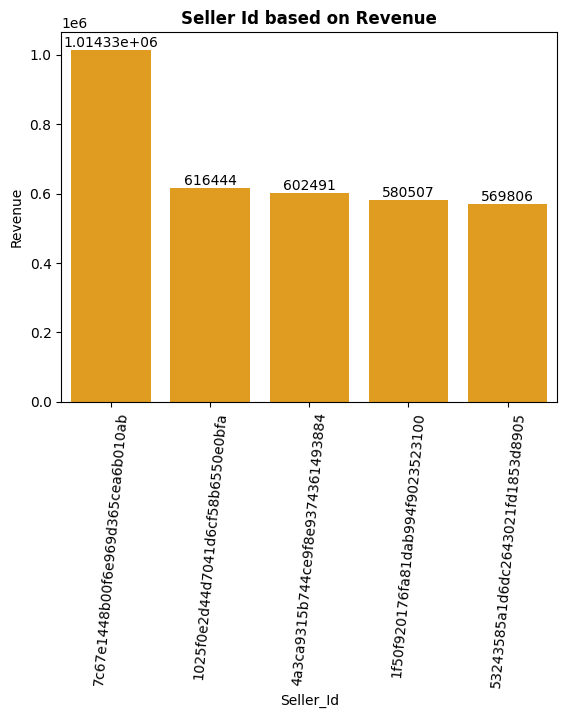

In [18]:
ax=sns.barplot(x="Seller_Id",y="Revenue",data=Top5,color="orange")
plt.xticks(rotation=85)
ax.bar_label(ax.containers[0])
plt.title("Seller Id based on Revenue",fontweight="bold")
plt.show()

### Calculate the moving average of order values for each customer over their order history.

In [23]:
query = """ select customer_id,order_purchase_timestamp,payment,
avg(payment) over(partition by customer_id order by order_purchase_timestamp
rows between 2 preceding and current row) as Moving_Avg 
from
(select o.customer_id,o.order_purchase_timestamp,
py.payment_value as payment
from orders o join payments py on o.order_id=py.order_id) as A """
cur.execute(query)
data=cur.fetchall()
Df=pd.DataFrame(data,columns=["Customer_id","Order_Date/Time","Payment","Moving_Avg"])
Df

,Customer_id,Order_Date/Time,Payment,Moving_Avg
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
1,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
2,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
3,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
4,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,67.41,67.410004
...,...,...,...,...
415539,ffffa3172527f765de70084a7e53aae8,2017-09-02 11:53:32,45.50,45.500000
415540,ffffe8b65bbe3087b653a978c870db99,2017-09-29 14:07:03,18.37,18.370001
415541,ffffe8b65bbe3087b653a978c870db99,2017-09-29 14:07:03,18.37,18.370001
415542,ffffe8b65bbe3087b653a978c870db99,2017-09-29 14:07:03,18.37,18.370001


### Calculate the cumulative sales per month for each year.

In [24]:
query = """ select years,months,payment,sum(payment) over (order by years,months)
as cumulative_sales from
(select year(o.order_purchase_timestamp) as years,month(o.order_purchase_timestamp)
as months,round(sum(py.payment_value),2) as payment from  orders o join payments py on o.order_id=py.order_id
group by years,months order by years,months) as  A """
cur.execute(query)
data=cur.fetchall()
Df=pd.DataFrame(data,columns=["Years","Months","Payment","Cumulative Sales"])
Df

,Years,Months,Payment,Cumulative Sales
0,2016,9,1008.96,1008.96
1,2016,10,236361.92,237370.88
2,2016,12,78.48,237449.36
3,2017,1,553952.16,791401.52
4,2017,2,1167632.04,1959033.56
5,2017,3,1799454.40,3758487.96
6,2017,4,1671152.12,5429640.08
7,2017,5,2371675.28,7801315.36
8,2017,6,2045105.52,9846420.88
9,2017,7,2369531.68,12215952.56


### Calculate the year over year growth rate to total sales

In [48]:
query = """ with a as (select year(o.order_purchase_timestamp) as years,
round(sum(py.payment_value),2) as payment from  orders o 
join payments py on o.order_id=py.order_id
group by years order by years)

select years,
((payment-lag(payment,1) over (order by years))/
lag(payment,1) over (order by years)) * 100
as Year_over_year_percentage_growth from a """
cur.execute(query)
data=cur.fetchall()
Df=pd.DataFrame(data,columns=["Years","YOY % Growth"])
Df

,Years,YOY % Growth
0,2016,NaN
1,2017,12112.703757
2,2018,20.000924


### IDentify the top3 customers who spent most money in each year.

In [49]:
query = """ select years,customer_id,payment,D_rank
from
(select o.customer_id,
year(o.order_purchase_timestamp) as years,
sum(py.payment_value) as payment,
dense_rank() over(partition by year(o.order_purchase_timestamp)
order by sum(py.payment_value) desc) as D_rank
from orders o join payments as py 
on py.order_id=o.order_id
group by years,o.customer_id) as a
where D_rank <= 3 """
cur.execute(query)
data=cur.fetchall()
Df=pd.DataFrame(data,columns=["Years","Customer_id","Payment","Rank"])
Df

,Years,Customer_id,Payment,Rank
0,2016,a9dc96b027d1252bbac0a9b72d837fc6,5694.200195,1
1,2016,1d34ed25963d5aae4cf3d7f3a4cda173,5602.959961,2
2,2016,4a06381959b6670756de02e07b83815f,4911.120117,3
3,2017,1617b1357756262bfa56ab541c47bc16,54656.320312,1
4,2017,c6e2731c5b391845f6800c97401a43a9,27717.240234,2
5,2017,3fd6777bbce08a352fddd04e4a7cc8f6,26906.640625,3
6,2018,ec5b2ba62e574342386871631fafd3fc,29099.519531,1
7,2018,f48d464a0baaea338cb25f816991ab1f,27688.839844,2
8,2018,e0a2412720e9ea4f26c1ac985f6a7358,19237.759766,3


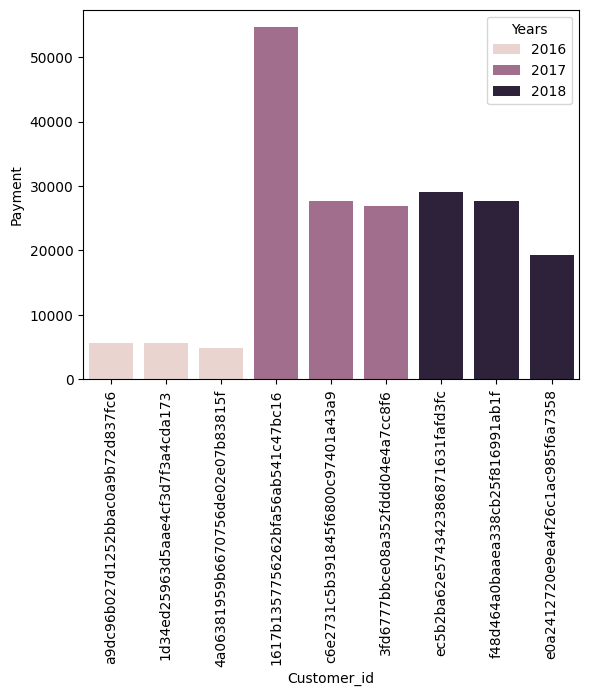

In [55]:
sns.barplot(x="Customer_id",y="Payment",data=Df,hue="Years")
plt.xticks(rotation=90)
plt.show()